In [3]:
# Importing necessary libraries for evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from nltk.translate.bleu_score import sentence_bleu
from collections import defaultdict
import numpy as np

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

# True answers provided for evaluation
true_answers = {
    "deadline for annual benefits enrollment": "October 20, 2021",
    "HSA contribution limit": "$3,650 for employee-only coverage or $7,300 for family coverage",
    "medical plan choices": "Consumer Directed Plan and Consumer Directed High Deductible Plan"
}

# Model's generated answers to be evaluated against true answers
generated_answers = {
    "deadline for annual benefits enrollment": "October 20, 2021",
    "HSA contribution limit": "3650 dollars for an individual",
    "medical plan choices": "Directed Consumer Plan and High Deductible Plan"
}

# Convert the true and generated answers into binary labels for classification metrics
# 1 for a correct answer, 0 for an incorrect answer
true_binary = [1, 1, 1]  # All true answers are assumed correct for this example
generated_binary = [1 if generated_answers[key] == true_answers[key] else 0 for key in true_answers]

# Function to calculate basic classification metrics
def calculate_basic_metrics(true_labels, predicted_labels):
    # Calculates accuracy, precision, recall, and F1 score
    # These are common metrics for binary classification tasks
    return {
        'Accuracy': accuracy_score(true_labels, predicted_labels),
        'Precision': precision_score(true_labels, predicted_labels),
        'Recall': recall_score(true_labels, predicted_labels),
        'F1 Score': f1_score(true_labels, predicted_labels)
    }

# Function to calculate F-beta scores which are variations of F1 score
def calculate_fbeta_scores(true_labels, predicted_labels):
    # F2 score puts more emphasis on recall
    # F0.5 score puts more emphasis on precision
    return {
        'F2 Score': fbeta_score(true_labels, predicted_labels, beta=2),
        'F0.5 Score': fbeta_score(true_labels, predicted_labels, beta=0.5)
    }

# Function to calculate BLEU score for text evaluation
def calculate_text_metrics(true_answers, generated_answers):
    # Stores the BLEU scores for each question-answer pair
    bleu_scores = defaultdict(float)
    
    # Loop through each key-value pair in the true answers
    for key, true_sentence in true_answers.items():
        # Split the sentences into words for BLEU score calculation
        reference = [true_sentence.split()]
        hypothesis = generated_answers[key].split()
        # Calculate the BLEU score and store it in the dictionary
        bleu_scores[key] = sentence_bleu(reference, hypothesis)
    
    # Return the dictionary of BLEU scores
    return bleu_scores

# Calculate the basic metrics using the functions defined above
basic_metrics = calculate_basic_metrics(true_binary, generated_binary)
# Calculate the F-beta scores
fbeta_metrics = calculate_fbeta_scores(true_binary, generated_binary)
# Calculate the BLEU scores for text quality
bleu_scores = calculate_text_metrics(true_answers, generated_answers)

# Output the results of the metrics calculations
print("Basic Metrics:", basic_metrics)
print("F-Beta Metrics:", fbeta_metrics)
print("BLEU Scores:", bleu_scores)



Basic Metrics: {'Accuracy': 0.3333333333333333, 'Precision': 1.0, 'Recall': 0.3333333333333333, 'F1 Score': 0.5}
F-Beta Metrics: {'F2 Score': 0.3846153846153846, 'F0.5 Score': 0.7142857142857143}
BLEU Scores: defaultdict(<class 'float'>, {'deadline for annual benefits enrollment': 1.2213386697554703e-77, 'HSA contribution limit': 5.474320712955125e-232, 'medical plan choices': 5.1612152302653315e-78})


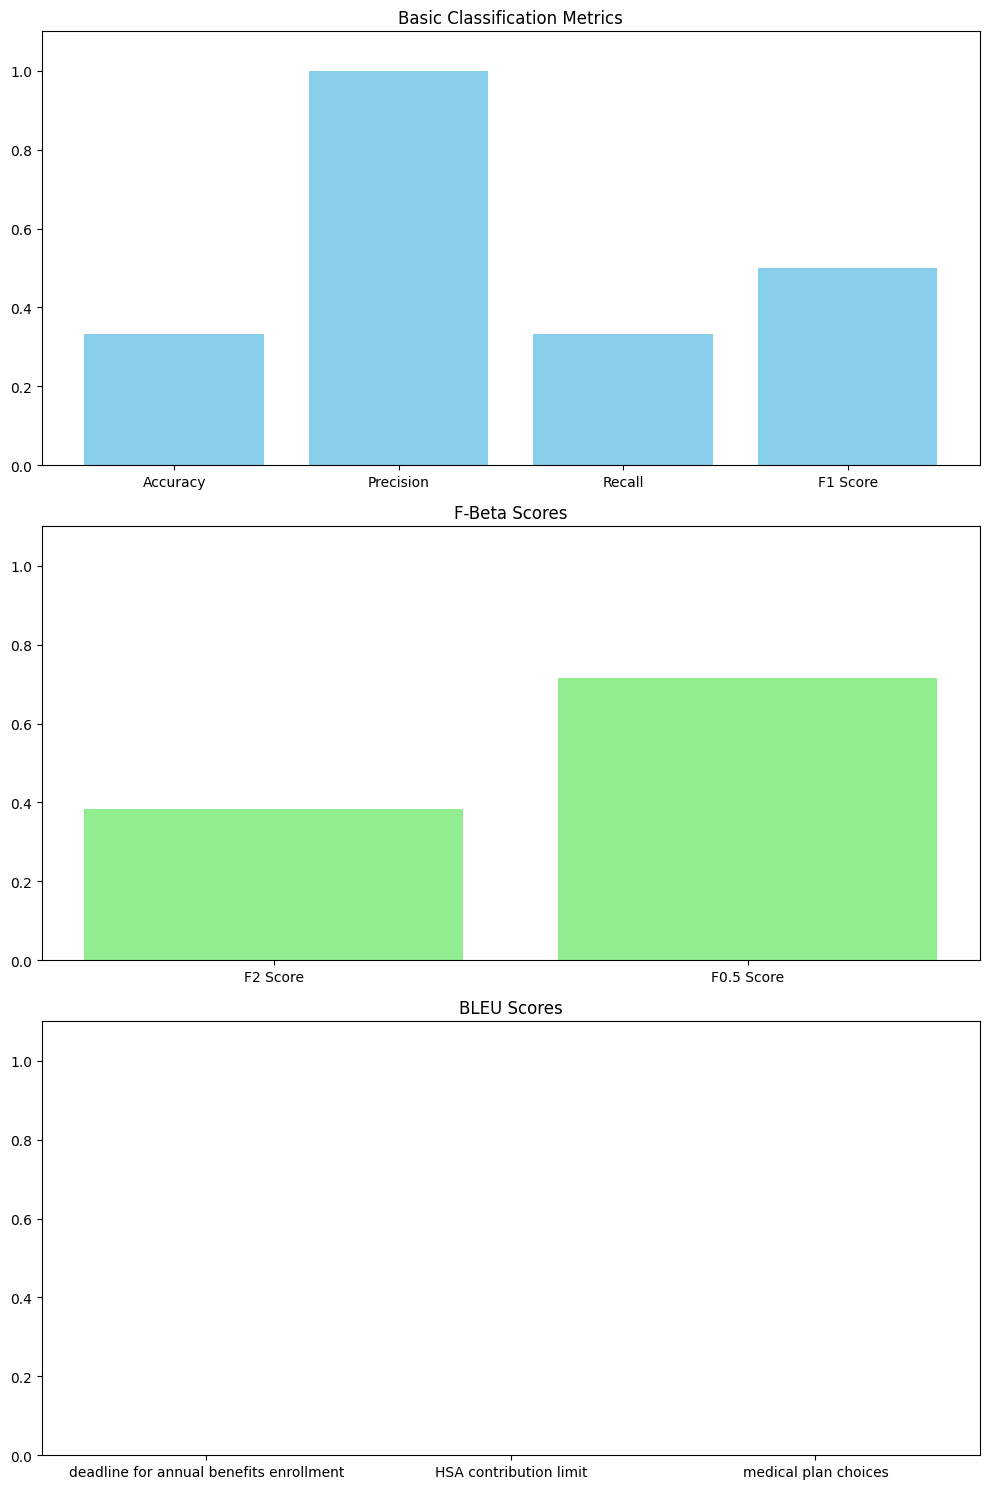

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from nltk.translate.bleu_score import sentence_bleu
from collections import defaultdict
import warnings

# Sample true and generated answers
true_answers = {
    "deadline for annual benefits enrollment": "October 20, 2021",
    "HSA contribution limit": "$3,650 for employee-only coverage or $7,300 for family coverage",
    "medical plan choices": "Consumer Directed Plan and Consumer Directed High Deductible Plan"
}

generated_answers = {
    "deadline for annual benefits enrollment": "October 20, 2021",
    "HSA contribution limit": "3650 dollars for an individual",
    "medical plan choices": "Directed Consumer Plan and High Deductible Plan"
}

# Convert the true and generated answers into binary labels for classification metrics
true_binary = [1, 1, 1]  # All true answers are assumed correct for this example
generated_binary = [1 if generated_answers[key] == true_answers[key] else 0 for key in true_answers]

# Function to calculate basic classification metrics
def calculate_basic_metrics(true_labels, predicted_labels):
    return {
        'Accuracy': accuracy_score(true_labels, predicted_labels),
        'Precision': precision_score(true_labels, predicted_labels),
        'Recall': recall_score(true_labels, predicted_labels),
        'F1 Score': f1_score(true_labels, predicted_labels)
    }

# Function to calculate F-beta scores
def calculate_fbeta_scores(true_labels, predicted_labels):
    return {
        'F2 Score': fbeta_score(true_labels, predicted_labels, beta=2),
        'F0.5 Score': fbeta_score(true_labels, predicted_labels, beta=0.5)
    }

# Function to calculate BLEU score for text evaluation
def calculate_text_metrics(true_answers, generated_answers):
    bleu_scores = defaultdict(float)
    for key, true_sentence in true_answers.items():
        reference = [true_sentence.split()]
        hypothesis = generated_answers[key].split()
        bleu_scores[key] = sentence_bleu(reference, hypothesis)
    return bleu_scores

# Calculate the metrics
basic_metrics = calculate_basic_metrics(true_binary, generated_binary)
fbeta_metrics = calculate_fbeta_scores(true_binary, generated_binary)
bleu_scores = calculate_text_metrics(true_answers, generated_answers)

# Hide warnings
warnings.filterwarnings('ignore')

# Create a figure for the metrics
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot basic metrics
axs[0].bar(basic_metrics.keys(), basic_metrics.values(), color='skyblue')
axs[0].set_title('Basic Classification Metrics')
axs[0].set_ylim(0, 1.1)

# Plot F-beta scores
axs[1].bar(fbeta_metrics.keys(), fbeta_metrics.values(), color='lightgreen')
axs[1].set_title('F-Beta Scores')
axs[1].set_ylim(0, 1.1)

# Plot BLEU scores
axs[2].bar(bleu_scores.keys(), bleu_scores.values(), color='salmon')
axs[2].set_title('BLEU Scores')
axs[2].set_ylim(0, 1.1)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


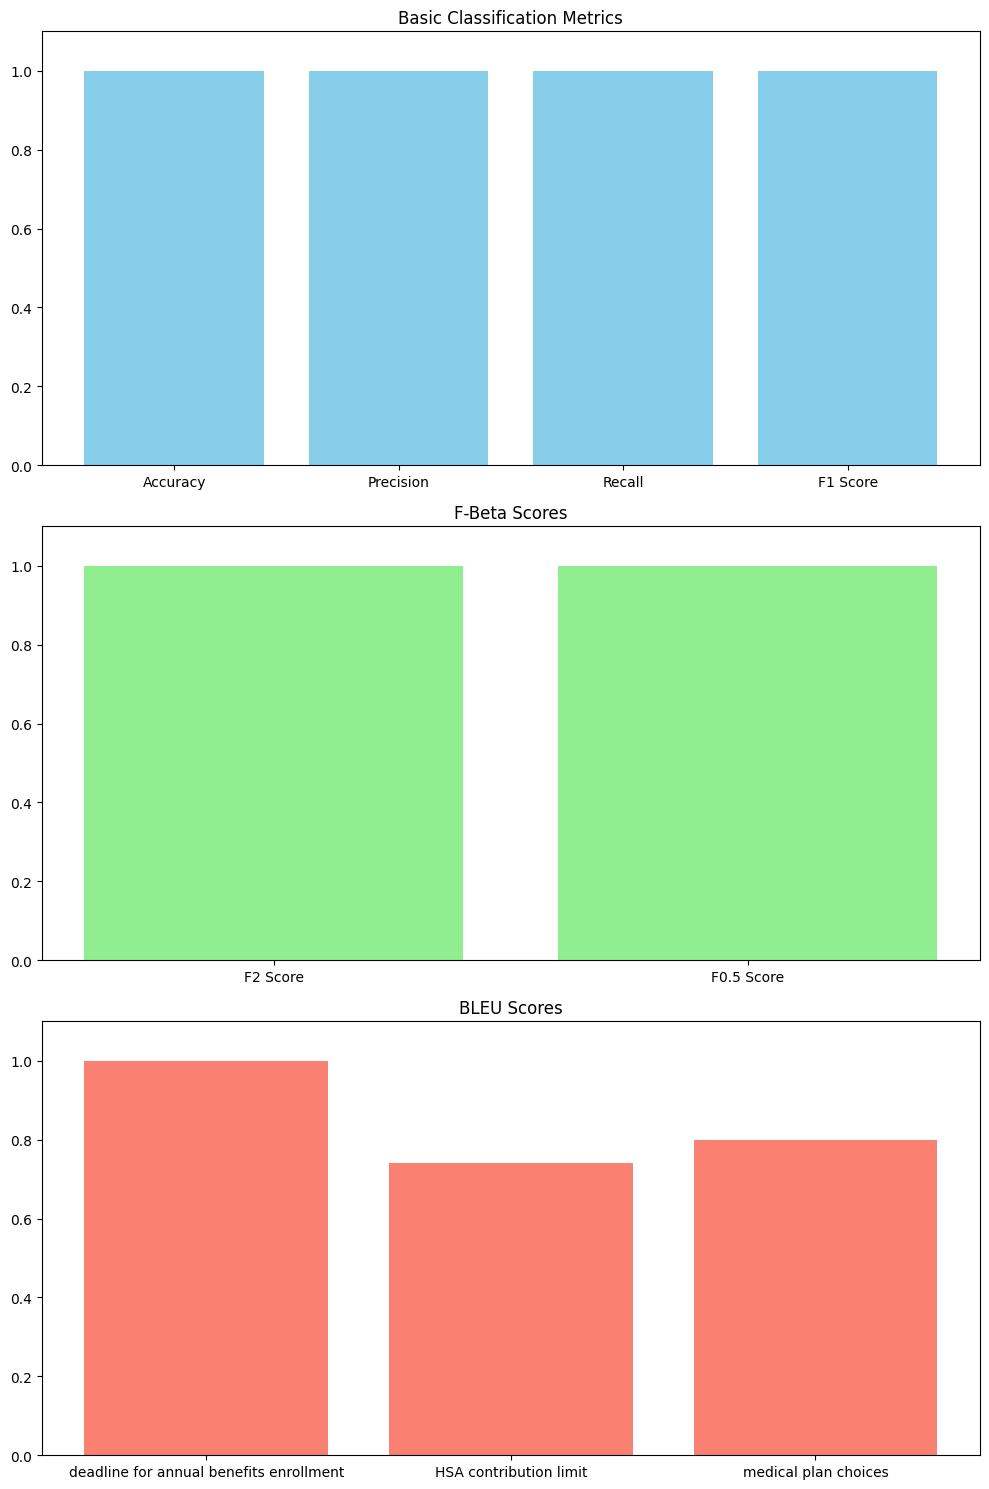